In [13]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'figure.dpi': 1000,
    'axes.labelsize': 6,
    'xtick.direction': 'in',
    'xtick.labelsize': 6,
    'xtick.top': True,
    'xtick.major.width': 0.5,
    'ytick.direction': 'in',
    'ytick.labelsize': 4,
    'ytick.right': True,
    'ytick.major.width': 0.5,
    'legend.fontsize': 6,
    'axes.linewidth': 0.5,
    'axes.titlesize': 6,
    'grid.linewidth': 0.5,
    'legend.fontsize': 6
})

In [2]:
import numpy as np


def g1_Shih(theta1):
    return -(2 / 3) / (1.25 + np.sqrt(2 * theta1) + 0.9 * np.sqrt(2 * theta1))


def g1_SR(theta1):
    return -0.248 / (0.465 + np.sqrt(theta1))


def g1_SR0(x0, x1, x2, x3, x4, x5):
    f = -5.626737409510 * np.exp((np.pi / (x0 + np.sqrt(np.pi))))
    return f / 1.e2


def g1_SR0_embed(x0):
    f = -5.626737409510 * np.exp((np.pi / (x0 + np.sqrt(np.pi))))
    return f / 1.e2


def g2_Shih(theta1):
    return 7.5 / (1.e3 + np.power(2 * theta1, 1.5))


def g2_SR(theta1):
    f = 3.157138851220 + (theta1 /
                          np.sqrt(np.sqrt((theta1 + np.sqrt(np.exp(theta1))))))
    return f / 1.e3


def g2_SR0(x0, x1, x2, x3, x4, x5):
    f = -7.189861524720 * np.arctan(x0 + x1 + x2 + (x4 - 1.0) * np.arctan(1))
    return f / 1.e3 - 0.005


def g2_SR0_embed(x0, x2):
    f = -7.189861524720 * np.arctan(x2 + (-x0 * x0 / 2 - 1.0) * np.arctan(1))
    return f / 1.e3 - 0.005


def g3_Shih(theta1):
    return 1.5 / (1.e3 + np.power(2 * theta1, 1.5))


def g3_SR(theta1):
    f = 0.390420742589 + np.log((np.sqrt(
        (np.pi - ((np.sin(theta1) + 1) + 1))) + 1))
    return f / 1.e3


def g3_SR0(x0, x1, x2, x3, x4, x5):
    f = -1.293269199777 * np.sin((x1 / ((np.cos((x2 - x5)) + 1) + 1)))
    return f / 1.e3


def g3_SR0_embed(x0, x2, x5):
    f = -1.293269199777 * np.sin((-x0 / ((np.cos((x2 - x5)) + 1) + 1)))
    return f / 1.e3


def g4_Shih(theta1):
    return -9.5 / (1.e3 + np.power(2 * theta1, 1.5))


def g4_SR(theta1):
    return -2.366758775969e-3 * np.sqrt(((theta1 + 1) + 1))


def g4_SR0(x0, x1, x2, x3, x4, x5):
    f = -2.388310303261 * np.sqrt((np.sin(np.exp(x3)) - (x1 - 1)))
    return f / 1.e3


def g4_SR0_embed(x0, x2):
    f = -2.388310303261 * np.sqrt((np.sin(np.exp(-x2 / 2)) - (-x0 - 1)))
    return f / 1.e3


import time
import tensorflow as tf
import numpy as np
import os

# set threads of tf = 1
os.environ["TF_NUM_INTEROP_THREADS"] = "1"  #
os.environ["TF_NUM_INTRAOP_THREADS"] = "1"  #
# set threads of openmp = 1
os.environ["OMP_NUM_THREADS"] = "1"  #

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

f = open('python_module.log', 'w+')
print('_________________________________________________________________',
      file=f)
print('Computing function of scalar invariants from Python module', file=f)
print('Tensorflow version', tf.__version__, file=f)
print('_________________________________________________________________',
      file=f)

# tf.keras.backend.clear_session()
# tf.config.threading.set_intra_op_parallelism_threads(2)
# load model

model_path = '../NN-pre-train/nn_model_235.h5'
model = tf.keras.models.load_model(model_path)
# model.summary()

# load weights
# get weights flatten
weights_flatten = np.loadtxt('nn_weights_flatten.dat')
# weights_flatten = np.loadtxt('/home/wuct/dafi/pehills-NN-closure/inputs/w.0')

# get model shape
shapes = []
for iw in model.trainable_variables:
    shapes.append(iw.shape)

# shapes to sizes
sizes = []
for shape in shapes:
    isize = 1
    for ishape in shape:
        isize *= ishape
    sizes.append(isize)

# reshape weights
w_reshaped = []
i = 0
for shape, size in zip(shapes, sizes):
    w_reshaped.append(weights_flatten[i:i + size].reshape(shape))
    i += size
    # print(w_reshaped)
model.set_weights(w_reshaped)

print(model.get_weights(), file=f)
print('Neural-network weights loaded successfully', file=f)

# load scale tick
# scale_tick = np.loadtxt('/home/wuct/dafi/pehills-NN-closure/NN-PRE-TRAIN/scale_tick.dat')
# print('Load scale tick successfully\n')


def ml_func(array):
    t1 = time.time()
    # print(np.shape(array))
    array_scaled = np.zeros_like(array)

    theta1_min = array[:, 0].min()
    theta1_max = array[:, 0].max()

    theta2_min = array[:, 1].min()
    theta2_max = array[:, 1].max()

    theta3_min = array[:, 1].min()
    theta3_max = array[:, 1].max()

    theta4_min = array[:, 1].min()
    theta4_max = array[:, 1].max()

    theta5_min = array[:, 1].min()
    theta5_max = array[:, 1].max()

    theta6_min = array[:, 1].min()
    theta6_max = array[:, 1].max()

    array_scaled[:, 0] = (array[:, 0] - theta1_min) / (theta1_max - theta1_min)
    array_scaled[:, 1] = (array[:, 1] - theta2_min) / (theta2_max - theta2_min)
    array_scaled[:, 2] = (array[:, 2] - theta3_min) / (theta3_max - theta3_min)
    array_scaled[:, 3] = (array[:, 3] - theta4_min) / (theta4_max - theta4_min)
    array_scaled[:, 4] = (array[:, 4] - theta5_min) / (theta5_max - theta5_min)
    array_scaled[:, 5] = (array[:, 5] - theta6_min) / (theta6_max - theta6_min)

    g_ = model(array_scaled, training=False)

    g = np.array(g_).reshape(-1, 5).astype('double')
    # print(g)
    scale = [1.e-1, 1.e-3, 1.e-3, 1.e-3, 0]  # [0.1,0.001,0.001,0.001]
    init = [-0.09, 0, 0, 0, 0]  # [-0.09,1e-4,1e-4,1e-4]
    for i in range(g.shape[1]):
        # scale[i]*g[:, i] + (1.0 - scale[i])*init[i]
        g[:, i] = scale[i] * g[:, i] + init[i]

    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            if j == 0 and g[i, j] > -0.0:
                g[i, j] = -0.0
            # if j == 1 and g[i, j] > 0.01: g[i, j] = 0.01
            # if j == 2 and g[i, j] < -0.01: g[i, j] = -0.01
            # if j == 3 and g[i, j] < -0.01: g[i, j] = -0.01
    # print('using tensorflow time', time.time() - t1)

    return g

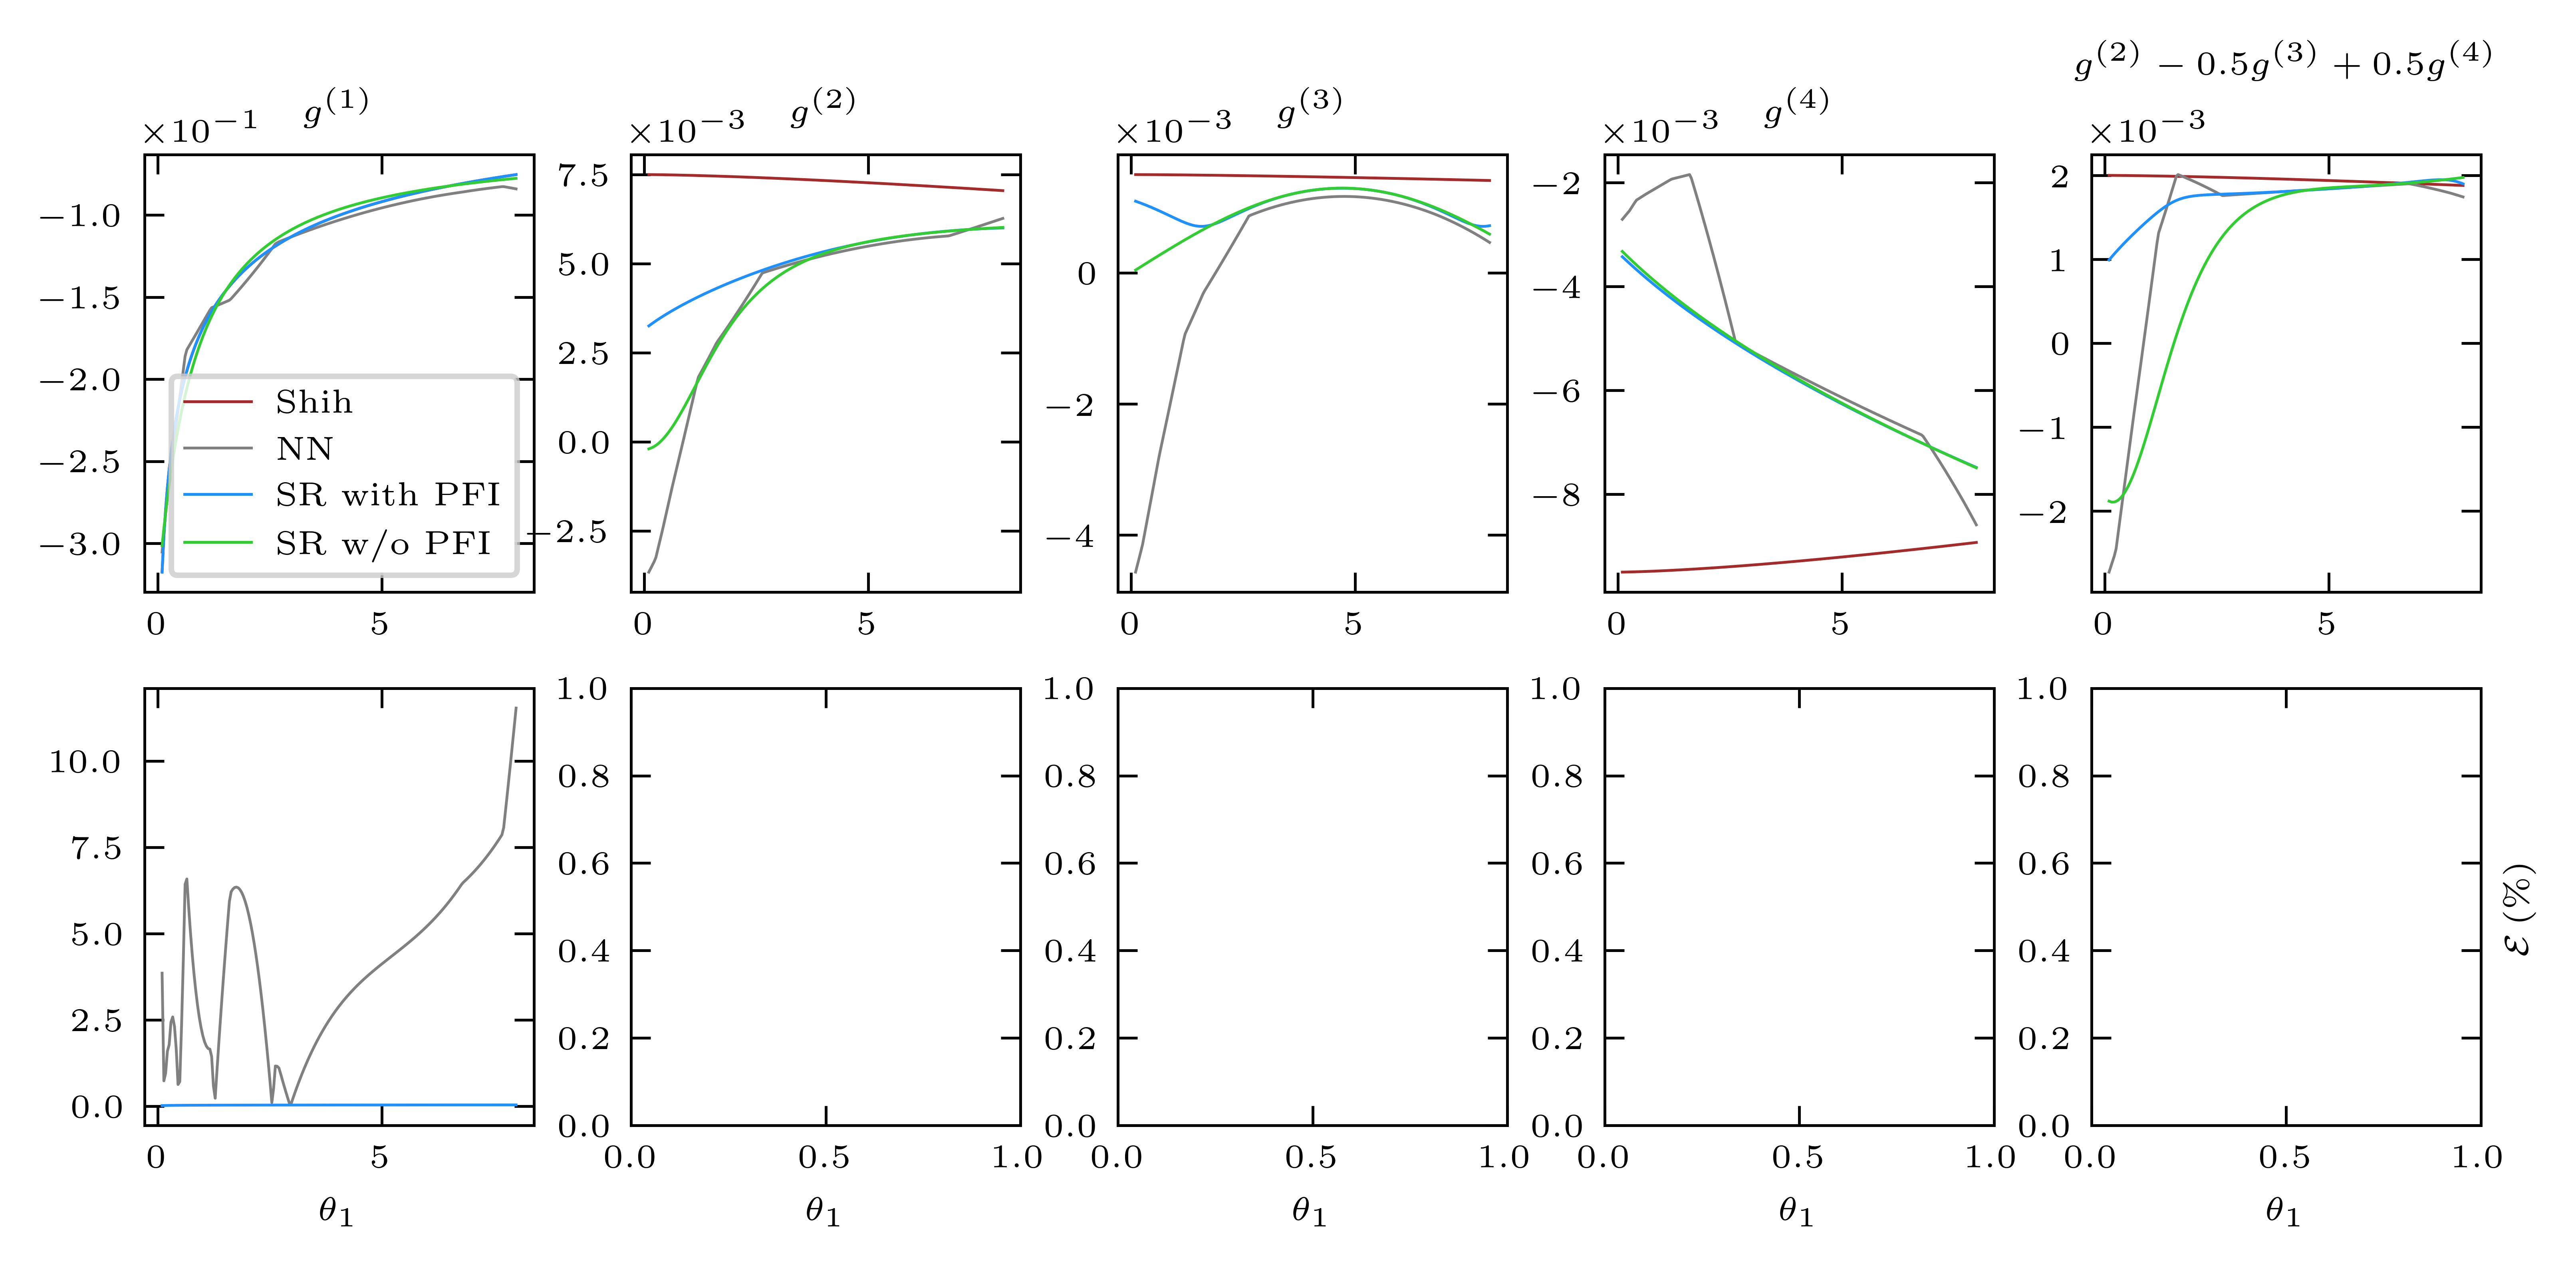

In [20]:
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(6.5, 3))
style_NN_org = {'color': 'gray', 'marker': ',', 'markersize': 3}
style_NN_sub = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.5}
style_Shih = {'color': 'brown', 'linestyle': '-', 'linewidth': 0.5}
style_SR = {'color': 'dodgerblue', 'linestyle': '-', 'linewidth': 0.5}
style_SR0 = {'color': 'limegreen', 'linestyle': '-', 'linewidth': 0.5}
style_Error = {'color': 'k', 'linestyle': '-', 'linewidth': 0.5}

# subspace of invariants
t1 = np.linspace(1.e-1, 8, 201)
t2 = -t1
t3 = np.zeros_like(t1)
t4 = -t3 / 3
t5 = -t1 * t1 / 2
t6 = np.zeros_like(t1)

# Shih
ax[0][0].plot(t1, g1_Shih(t1), **style_Shih, label='Shih')
ax[0][1].plot(t1, g2_Shih(t1), **style_Shih)
ax[0][2].plot(t1, g3_Shih(t1), **style_Shih)
ax[0][3].plot(t1, g4_Shih(t1), **style_Shih)
g5_Shih = g2_Shih(t1) - 0.5 * g3_Shih(t1) + 0.5 * g4_Shih(t1)
ax[0][4].plot(t1, g5_Shih, **style_Shih)

# NN
NN_inputs = np.array([t1, t2, t3, t4, t5, t6]).transpose()
g_NN = ml_func(NN_inputs)
ax[0][0].plot(t1, g_NN[:, 0], **style_NN_sub, label='NN')
ax[0][1].plot(t1, g_NN[:, 1], **style_NN_sub)
ax[0][2].plot(t1, g_NN[:, 2], **style_NN_sub)
ax[0][3].plot(t1, g_NN[:, 3], **style_NN_sub)
g5 = g_NN[:, 1] - 0.5 * g_NN[:, 2] + 0.5 * g_NN[:, 3]
ax[0][4].plot(t1, g5, **style_NN_sub)

# SR
ax[0][0].plot(t1, g1_SR(t1), **style_SR, label='SR with PFI')
ax[0][1].plot(t1, g2_SR(t1), **style_SR)
ax[0][2].plot(t1, g3_SR(t1), **style_SR)
ax[0][3].plot(t1, g4_SR(t1), **style_SR)
g5_SR = g2_SR(t1) - 0.5 * g3_SR(t1) + 0.5 * g4_SR(t1)
ax[0][4].plot(t1, g5_SR, **style_SR)

# SR0
ax[0][0].plot(t1,
              g1_SR0(t1, t2, t3, t4, t5, t6),
              **style_SR0,
              label='SR w/o PFI')
ax[0][1].plot(t1, g2_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
ax[0][2].plot(t1, g3_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
ax[0][3].plot(t1, g4_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
g5_SR0 = g2_SR0(t1, t2, t3, t4, t5, t6) - 0.5 * g3_SR0(
    t1, t2, t3, t4, t5, t6) + 0.5 * g4_SR0(t1, t2, t3, t4, t5, t6)
ax[0][4].plot(t1, g5_SR0, **style_SR0)

# error
ax[1][0].plot(t1,
              1.e2 * np.abs(g1_Shih(t1) - g_NN[:, 0]) / np.abs(g1_Shih(t1)),
              **style_NN_sub)
ax[1][0].plot(t1, 1.e2 * np.abs(g1_Shih(t1) - g1_SR(t1)) / np.abs(g1_Shih(t1)),
              **style_SR)
# ax[1][1].plot(t, 1.e2 * np.abs(g2_Shih(t) - g2_SR(t)) / np.abs(g2_Shih(t)),
#               **style_Error)
# ax[1][2].plot(t, 1.e2 * np.abs(g3_Shih(t) - g3_SR(t)) / np.abs(g3_Shih(t)),
#               **style_Error)
# ax[1][3].plot(t, 1.e2 * np.abs(g4_Shih(t) - g4_SR(t)) / np.abs(g4_Shih(t)),
#               **style_Error)
# ax[1][4].plot(t, 1.e2 * np.abs(g5_SR - g5_Shih) / np.abs(g5_Shih),
#               **style_Error)

ax[0][0].set(title=r'$g^{(1)}$')
ax[0][1].set(title=r'$g^{(2)}$')
ax[0][2].set(title=r'$g^{(3)}$')
ax[0][3].set(title=r'$g^{(4)}$')
ax[0][4].set(title=r'$g^{(2)}-0.5g^{(3)}+0.5g^{(4)}$')

ax[0][0].legend()
ax[1][4].set_ylabel(r'$\mathcal{E}\,(\%)$')
ax[1][4].yaxis.set_label_position('right')
# ax.yaxis.tick_right()
for i in range(5):
    # ax[0][i].set(xlabel=r'$\theta_1$')
    ax[1][i].set(xlabel=r'$\theta_1$')
    ax[0][i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    # ax[1][i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.subplots_adjust(left=0.05,
                    right=0.95,
                    wspace=0.25,
                    bottom=0.09,
                    top=0.9,
                    hspace=0.22)
plt.savefig('SR-DUCT-g1-4.png')

Reading file ../case-1/results_ensemble/sample_50\100\theta1
Reading file ../case-1/results_ensemble/sample_50\100\theta2
Reading file ../case-1/results_ensemble/sample_50\100\theta3
Reading file ../case-1/results_ensemble/sample_50\100\theta4
Reading file ../case-1/results_ensemble/sample_50\100\theta5
Reading file ../case-1/results_ensemble/sample_50\100\theta6


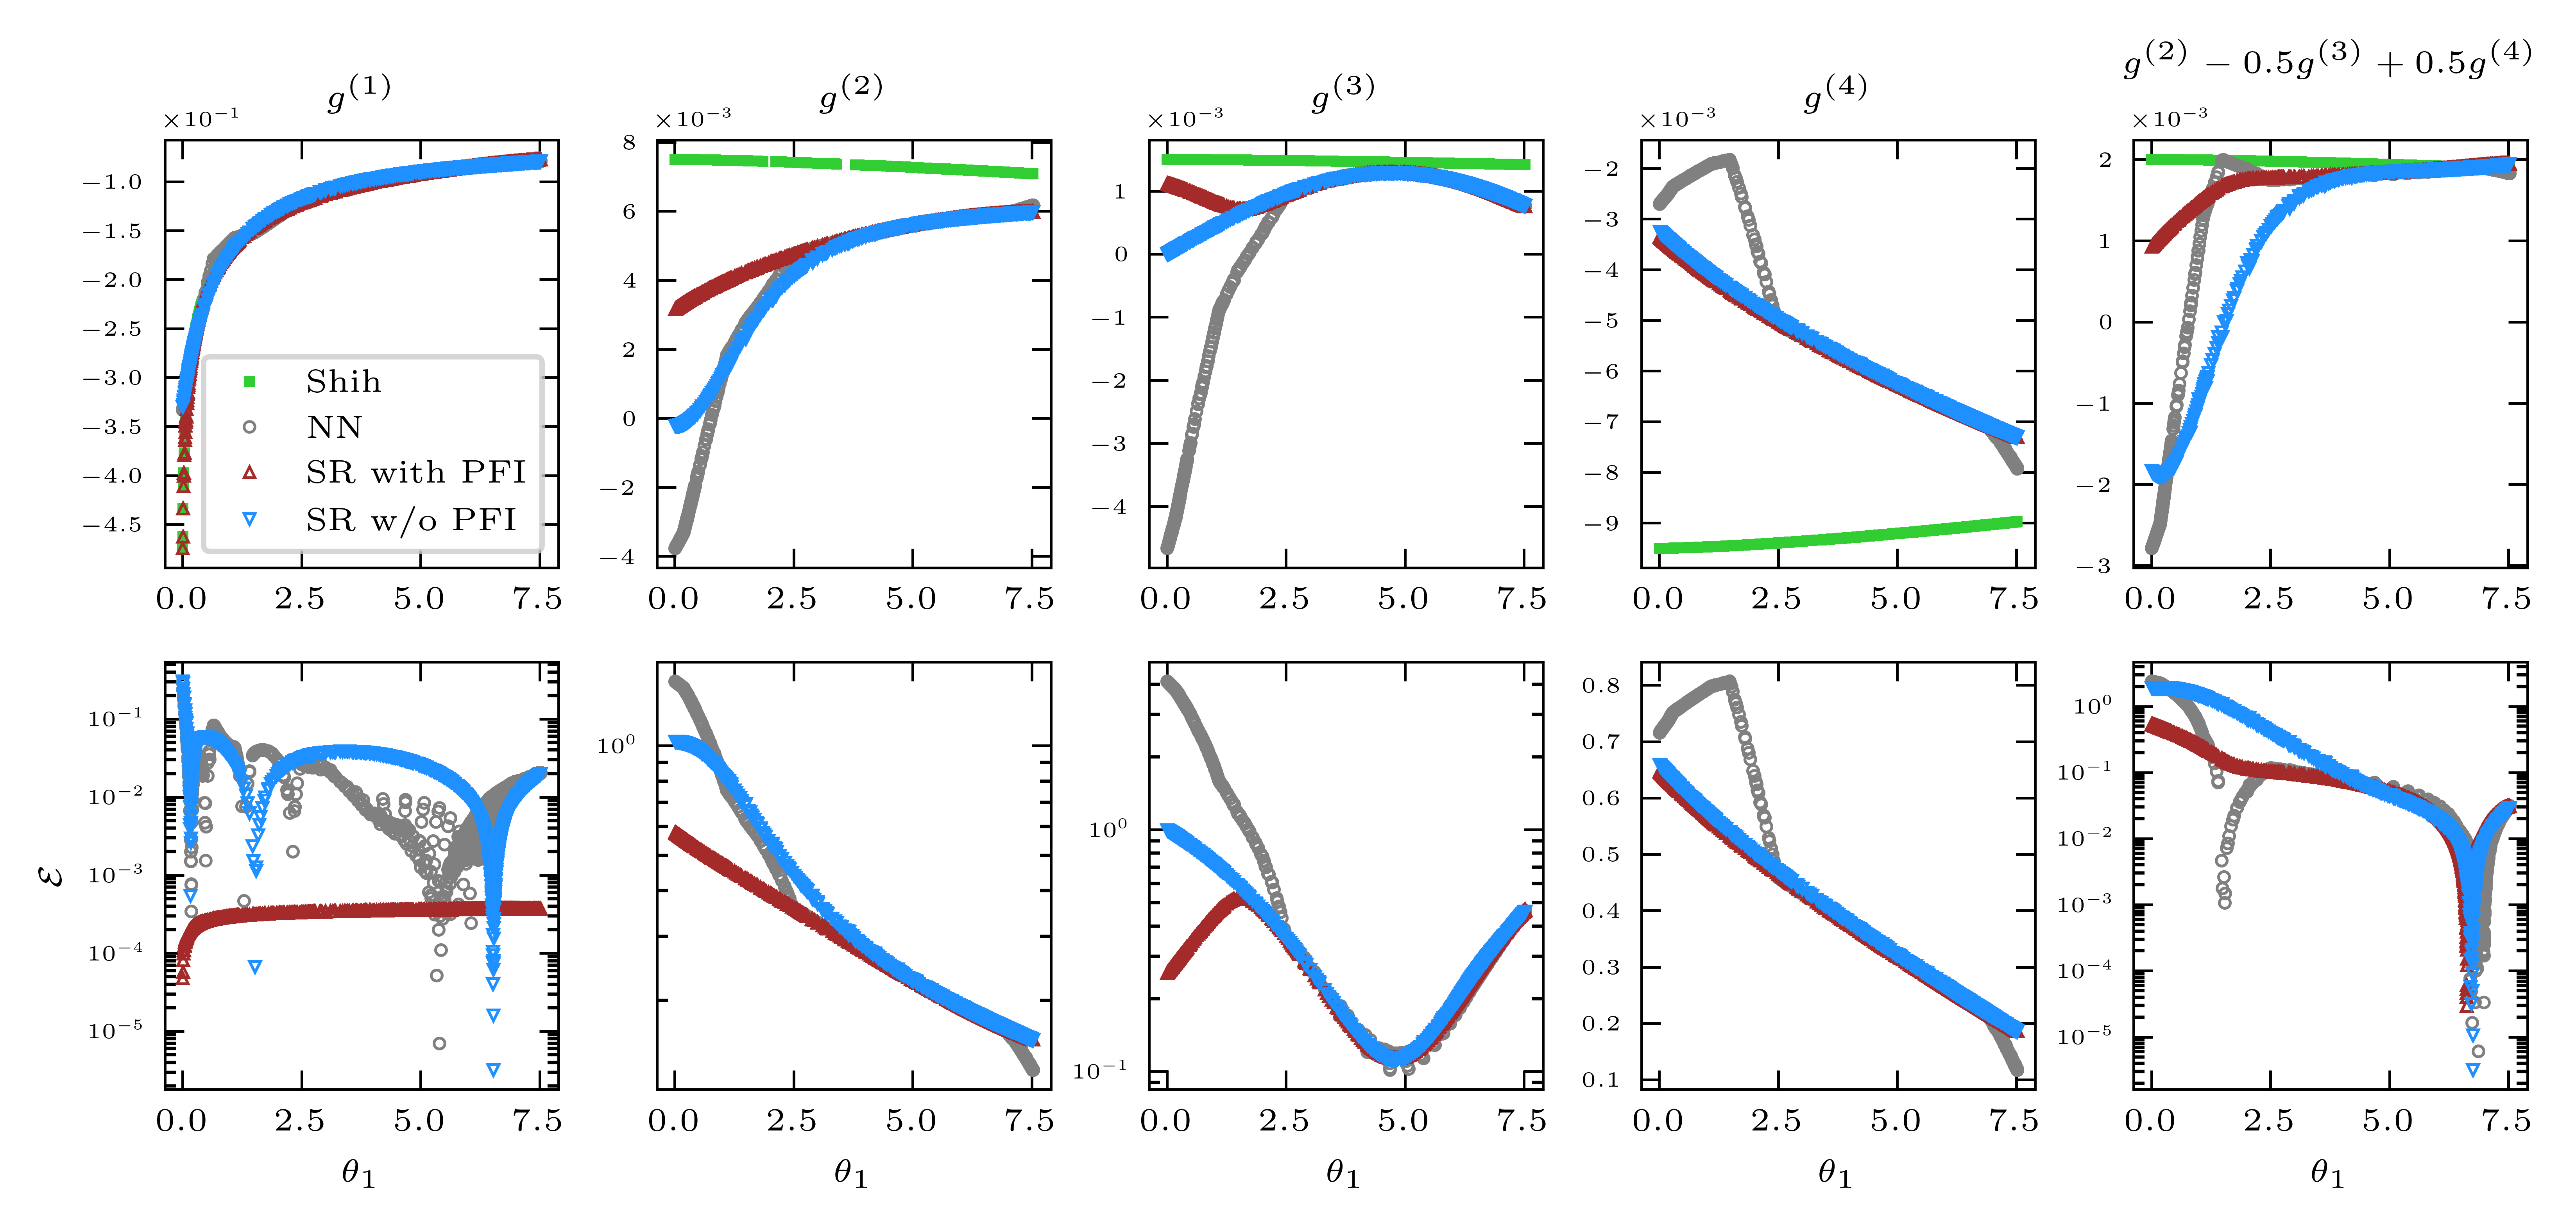

In [11]:
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt

sampleDir = '../case-1/results_ensemble/sample_50'
t1 = ff.readscalar(sampleDir, '100', 'theta1')
t2 = ff.readscalar(sampleDir, '100', 'theta2')
t3 = ff.readscalar(sampleDir, '100', 'theta3')
t4 = ff.readscalar(sampleDir, '100', 'theta4')
t5 = ff.readscalar(sampleDir, '100', 'theta5')
t6 = ff.readscalar(sampleDir, '100', 'theta6')

fig, ax = plt.subplots(2, 5, figsize=(6.5, 3))
style_NN_org = {
    'linestyle': 'none',
    'marker': 'o',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'gray',
    'markerfacecolor': 'none'
}
style_NN_sub = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.5}
style_Shih = {
    'color': 'limegreen',
    'linestyle': 'none',
    'marker': 's',
    'markersize': 2,
    # 'markerfacecolor': 'none',
    'markeredgewidth': 0,
    'markeredgecolor': 'limegreen'
}
style_SR = {
    'linestyle': 'none',
    'marker': '^',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'brown',
    'markerfacecolor': 'none'
    # 'alpha': 0.5
}
style_SR0 = {
    'linestyle': 'none',
    'marker': 'v',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'dodgerblue',
    'markerfacecolor': 'none'
}
style_Error = {'color': 'k', 'linestyle': '-', 'linewidth': 0.5}
sampleID = np.random.randint(0, np.size(t1), size=600)

# Shih
ax[0][0].plot(t1, g1_Shih(t1), **style_Shih, label='Shih')
ax[0][1].plot(t1[sampleID], g2_Shih(t1)[sampleID], **style_Shih)
ax[0][2].plot(t1, g3_Shih(t1), **style_Shih)
ax[0][3].plot(t1, g4_Shih(t1), **style_Shih)
g5_Shih = g2_Shih(t1) - 0.5 * g3_Shih(t1) + 0.5 * g4_Shih(t1)
ax[0][4].plot(t1, g5_Shih, **style_Shih)

# NN
NN_inputs = np.array([t1, t2, t3, t4, t5, t6]).transpose()
g_NN = ml_func(NN_inputs)
ax[0][0].plot(t1, g_NN[:, 0], **style_NN_org, label='NN')
ax[0][1].plot(t1, g_NN[:, 1], **style_NN_org)
ax[0][2].plot(t1, g_NN[:, 2], **style_NN_org)
ax[0][3].plot(t1, g_NN[:, 3], **style_NN_org)
g5_NN = g_NN[:, 1] - 0.5 * g_NN[:, 2] + 0.5 * g_NN[:, 3]
ax[0][4].plot(t1, g5_NN, **style_NN_org)

# SR
ax[0][0].plot(t1, g1_SR(t1), **style_SR, label='SR with PFI')
ax[0][1].plot(t1, g2_SR(t1), **style_SR)
ax[0][2].plot(t1, g3_SR(t1), **style_SR)
ax[0][3].plot(t1, g4_SR(t1), **style_SR)
g5_SR = g2_SR(t1) - 0.5 * g3_SR(t1) + 0.5 * g4_SR(t1)
ax[0][4].plot(t1, g5_SR, **style_SR)

# SR0
ax[0][0].plot(t1,
              g1_SR0(t1, t2, t3, t4, t5, t6),
              **style_SR0,
              label='SR w/o PFI')
ax[0][1].plot(t1, g2_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
ax[0][2].plot(t1, g3_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
ax[0][3].plot(t1, g4_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
g5_SR0 = g2_SR0(t1, t2, t3, t4, t5, t6) - 0.5 * g3_SR0(
    t1, t2, t3, t4, t5, t6) + 0.5 * g4_SR0(t1, t2, t3, t4, t5, t6)
ax[0][4].plot(t1, g5_SR0, **style_SR0)

# error
# g1
ax[1][0].plot(t1,
              np.abs(g1_Shih(t1) - g_NN[:, 0]) / np.abs(g1_Shih(t1)),
              **style_NN_org)
ax[1][0].plot(t1,
              np.abs(g1_Shih(t1) - g1_SR(t1)) / np.abs(g1_Shih(t1)),
              **style_SR)
ax[1][0].plot(
    t1,
    np.abs(g1_Shih(t1) - g1_SR0(t1, t2, t3, t4, t5, t6)) / np.abs(g1_Shih(t1)),
    **style_SR0)


# g2
ax[1][1].plot(t1,
              np.abs(g2_Shih(t1) - g_NN[:, 1]) / np.abs(g2_Shih(t1)),
              **style_NN_org)
ax[1][1].plot(t1,
              np.abs(g2_Shih(t1) - g2_SR(t1)) / np.abs(g2_Shih(t1)),
              **style_SR)
ax[1][1].plot(
    t1,
    np.abs(g2_Shih(t1) - g2_SR0(t1, t2, t3, t4, t5, t6)) / np.abs(g2_Shih(t1)),
    **style_SR0)

# g3
ax[1][2].plot(t1,
              np.abs(g3_Shih(t1) - g_NN[:, 2]) / np.abs(g3_Shih(t1)),
              **style_NN_org)
ax[1][2].plot(t1,
              np.abs(g3_Shih(t1) - g3_SR(t1)) / np.abs(g3_Shih(t1)),
              **style_SR)
ax[1][2].plot(
    t1,
    np.abs(g3_Shih(t1) - g3_SR0(t1, t2, t3, t4, t5, t6)) / np.abs(g3_Shih(t1)),
    **style_SR0)

# g4
ax[1][3].plot(t1,
              np.abs(g4_Shih(t1) - g_NN[:, 3]) / np.abs(g4_Shih(t1)),
              **style_NN_org)
ax[1][3].plot(t1,
              np.abs(g4_Shih(t1) - g4_SR(t1)) / np.abs(g4_Shih(t1)),
              **style_SR)
ax[1][3].plot(
    t1,
    np.abs(g4_Shih(t1) - g4_SR0(t1, t2, t3, t4, t5, t6)) / np.abs(g4_Shih(t1)),
    **style_SR0)

# g5
ax[1][4].plot(t1, np.abs(g5_Shih - g5_NN) / np.abs(g5_Shih), **style_NN_org)
ax[1][4].plot(t1, np.abs(g5_Shih - g5_SR) / np.abs(g5_Shih), **style_SR)
ax[1][4].plot(t1, np.abs(g5_Shih - g5_SR0) / np.abs(g5_Shih), **style_SR0)

ax[0][0].set(title=r'$g^{(1)}$')
ax[0][1].set(title=r'$g^{(2)}$')
ax[0][2].set(title=r'$g^{(3)}$')
ax[0][3].set(title=r'$g^{(4)}$')
ax[0][4].set(title=r'$g^{(2)}-0.5g^{(3)}+0.5g^{(4)}$')

ax[0][0].legend()
ax[1][0].set_ylabel(r'$\mathcal{E}$')
# ax[1][4].yaxis.set_label_position('right')
# ax.yaxis.tick_right()
for i in range(5):
    # ax[0][i].set(xlabel=r'$\theta_1$')
    ax[1][i].set(xlabel=r'$\theta_1$')
    ax[0][i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    if (i != 3): ax[1][i].set_yscale('log')
    # ax[1][i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.subplots_adjust(left=0.06,
                    right=0.99,
                    wspace=0.25,
                    bottom=0.09,
                    top=0.9,
                    hspace=0.22)
plt.savefig('SR-DUCT-g.png')

$g^{(1)}=\frac{-0.248}{\sqrt{\theta_1}+0.465}$

$g^{(2)}=\frac{1}{1000}\left(3.15714+\frac{\theta_1}{\left(\sqrt{e^\theta_1}+\theta_1\right)^{1/4}}\right)$

$g^{(3)}=\frac{1}{1000}\left(0.390421+\log\left(1+\sqrt{-2+\pi-\sin\theta_1}\right)\right)$

$g^{(4)}=-2.3668\times 10^{-3} \sqrt{\theta_1 + 2}
$

$\mathcal{E}=\frac{\|g_{\text{SR}}-g_{\text{Shih}}\|}{\|g_{\text{Shih}}\|}$

Reading file ../case-1/results_ensemble/sample_50\100\theta1
Reading file ../case-1/results_ensemble/sample_50\100\theta2
Reading file ../case-1/results_ensemble/sample_50\100\theta3
Reading file ../case-1/results_ensemble/sample_50\100\theta4
Reading file ../case-1/results_ensemble/sample_50\100\theta5
Reading file ../case-1/results_ensemble/sample_50\100\theta6
error g1 NN mean 4.712934e-03
error g1 SR mean 7.294973e-05
error g1 SR0 mean 5.522130e-03
error g2 NN mean 3.427834e-01
error g2 SR mean 2.384712e-01
error g2 SR0 mean 3.087763e-01
error g3 NN mean 6.856719e-01
error g3 SR mean 2.755632e-01
error g3 SR0 mean 3.508238e-01
error g4 NN mean 3.242940e-01
error g4 SR mean 3.033025e-01
error g4 SR0 mean 3.049380e-01
error g5 NN mean 2.584511e-01
error g5 SR mean 7.962509e-02
error g5 SR0 mean 3.080010e-01


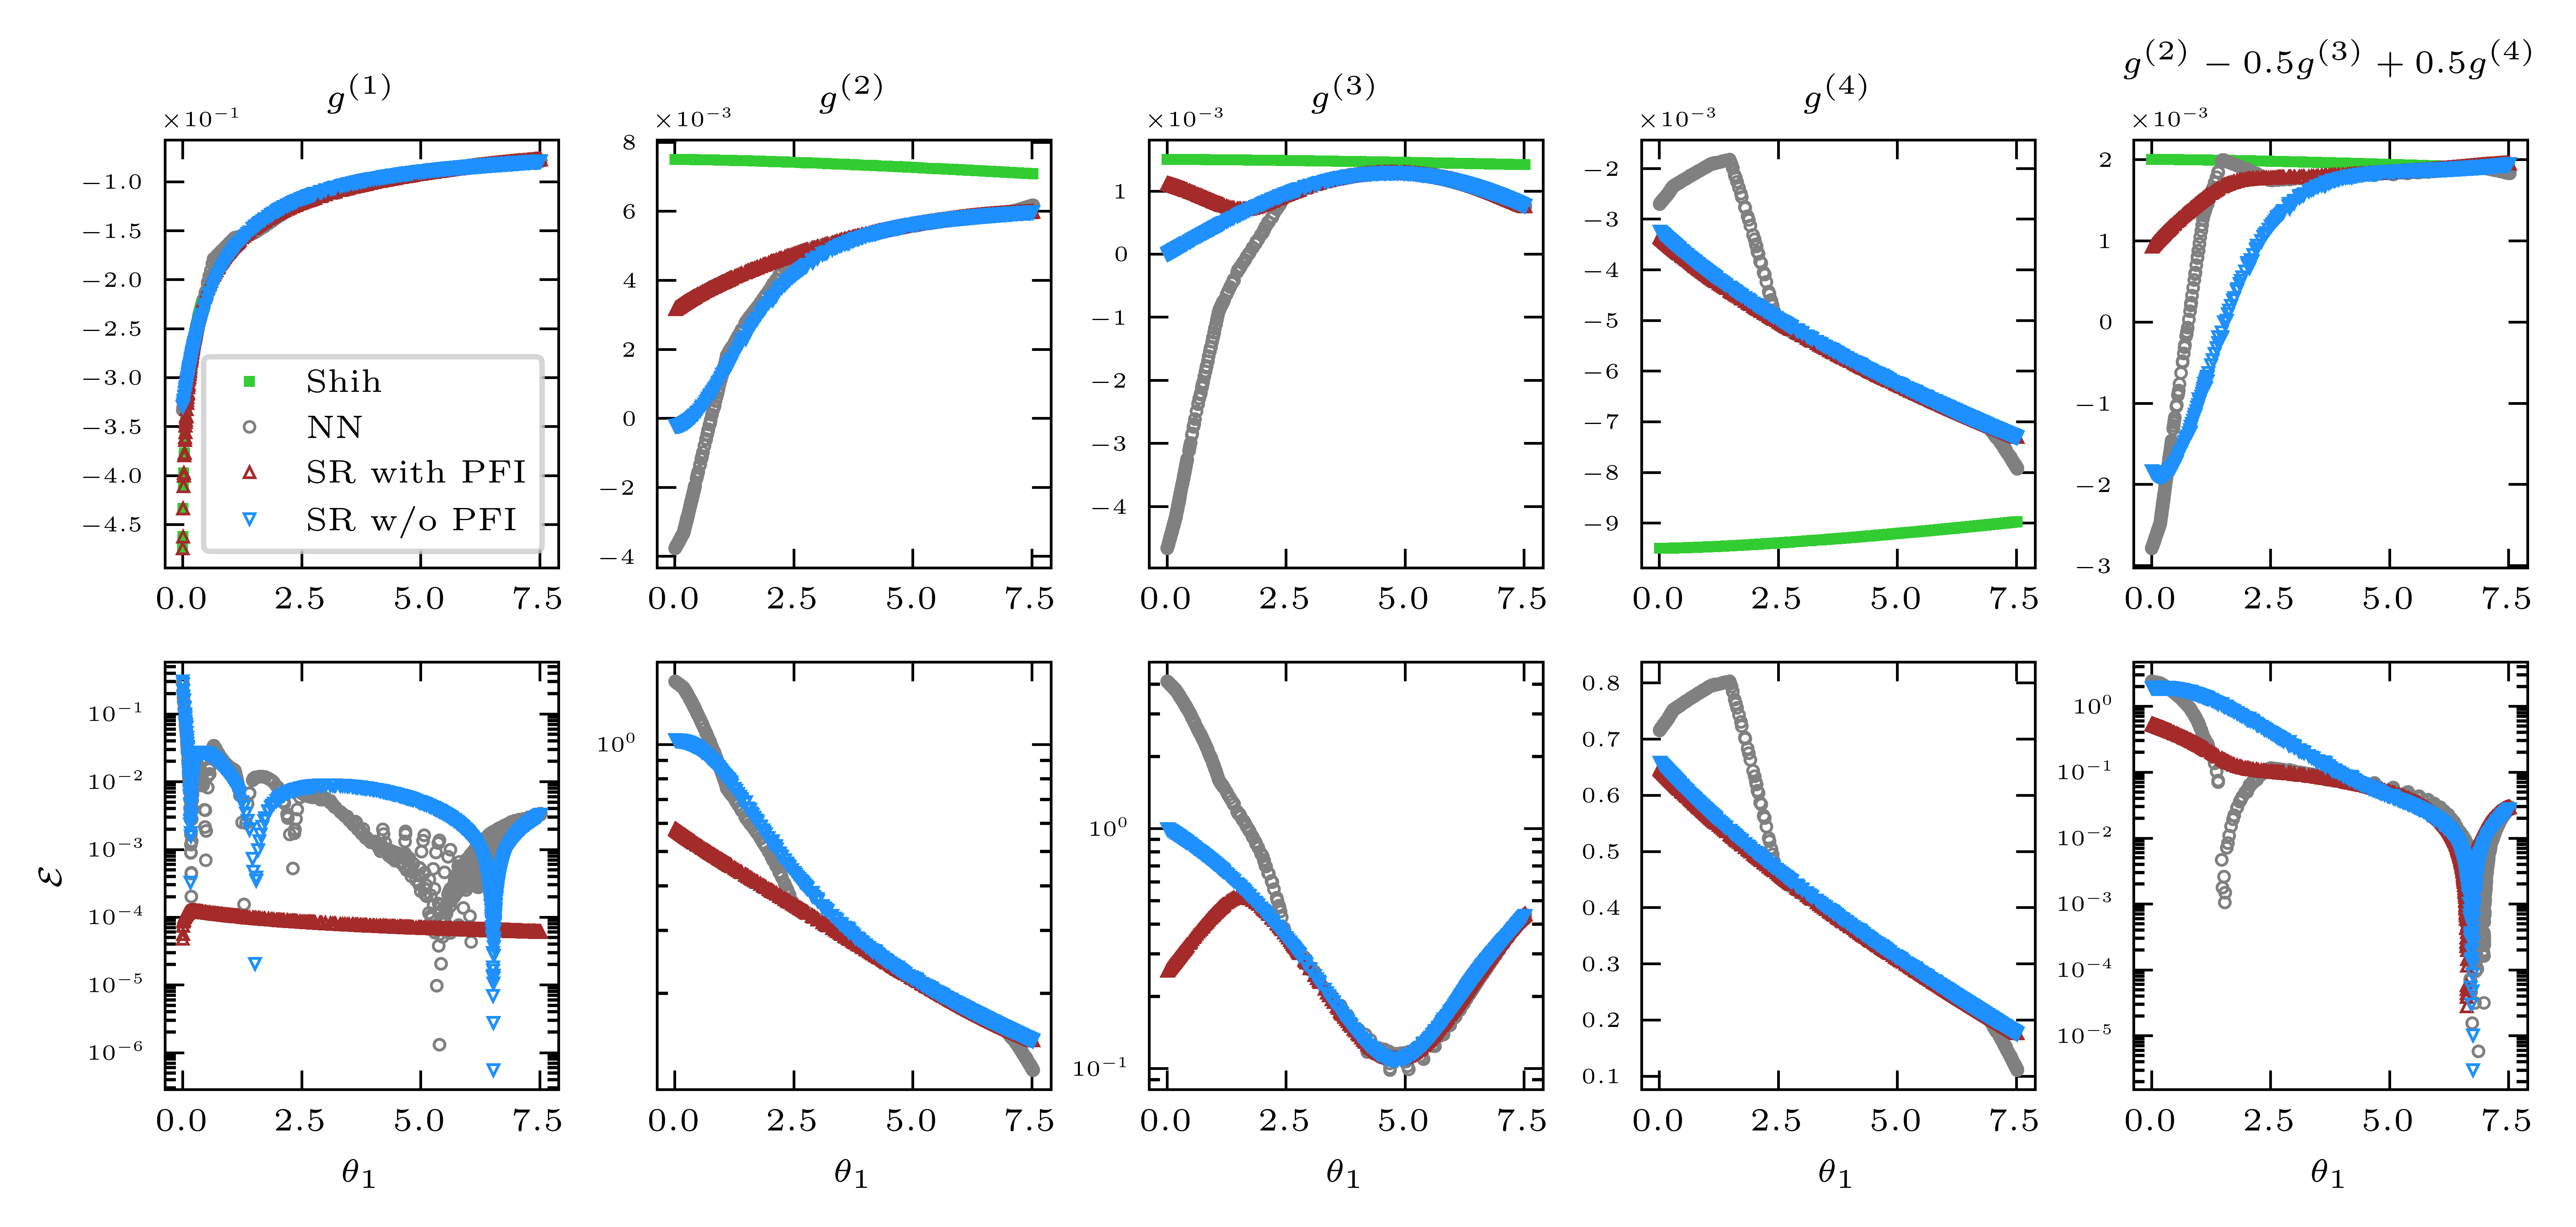

In [10]:
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt

sampleDir = '../case-1/results_ensemble/sample_50'
t1 = ff.readscalar(sampleDir, '100', 'theta1')
t2 = ff.readscalar(sampleDir, '100', 'theta2')
t3 = ff.readscalar(sampleDir, '100', 'theta3')
t4 = ff.readscalar(sampleDir, '100', 'theta4')
t5 = ff.readscalar(sampleDir, '100', 'theta5')
t6 = ff.readscalar(sampleDir, '100', 'theta6')

fig, ax = plt.subplots(2, 5, figsize=(6.5, 3))
style_NN_org = {
    'linestyle': 'none',
    'marker': 'o',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'gray',
    'markerfacecolor': 'none'
}
style_NN_sub = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.5}
style_Shih = {
    'color': 'limegreen',
    'linestyle': 'none',
    'marker': 's',
    'markersize': 2,
    # 'markerfacecolor': 'none',
    'markeredgewidth': 0,
    'markeredgecolor': 'limegreen'
}
style_SR = {
    'linestyle': 'none',
    'marker': '^',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'brown',
    'markerfacecolor': 'none'
    # 'alpha': 0.5
}
style_SR0 = {
    'linestyle': 'none',
    'marker': 'v',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'dodgerblue',
    'markerfacecolor': 'none'
}
style_Error = {'color': 'k', 'linestyle': '-', 'linewidth': 0.5}
sampleID = np.random.randint(0, np.size(t1), size=600)

# Shih
ax[0][0].plot(t1, g1_Shih(t1), **style_Shih, label='Shih')
ax[0][1].plot(t1[sampleID], g2_Shih(t1)[sampleID], **style_Shih)
ax[0][2].plot(t1, g3_Shih(t1), **style_Shih)
ax[0][3].plot(t1, g4_Shih(t1), **style_Shih)
g5_Shih = g2_Shih(t1) - 0.5 * g3_Shih(t1) + 0.5 * g4_Shih(t1)
ax[0][4].plot(t1, g5_Shih, **style_Shih)

# NN
NN_inputs = np.array([t1, t2, t3, t4, t5, t6]).transpose()
g_NN = ml_func(NN_inputs)
ax[0][0].plot(t1, g_NN[:, 0], **style_NN_org, label='NN')
ax[0][1].plot(t1, g_NN[:, 1], **style_NN_org)
ax[0][2].plot(t1, g_NN[:, 2], **style_NN_org)
ax[0][3].plot(t1, g_NN[:, 3], **style_NN_org)
g5_NN = g_NN[:, 1] - 0.5 * g_NN[:, 2] + 0.5 * g_NN[:, 3]
ax[0][4].plot(t1, g5_NN, **style_NN_org)

# SR
ax[0][0].plot(t1, g1_SR(t1), **style_SR, label='SR with PFI')
ax[0][1].plot(t1, g2_SR(t1), **style_SR)
ax[0][2].plot(t1, g3_SR(t1), **style_SR)
ax[0][3].plot(t1, g4_SR(t1), **style_SR)
g5_SR = g2_SR(t1) - 0.5 * g3_SR(t1) + 0.5 * g4_SR(t1)
ax[0][4].plot(t1, g5_SR, **style_SR)

# SR0
ax[0][0].plot(t1,
              g1_SR0(t1, t2, t3, t4, t5, t6),
              **style_SR0,
              label='SR w/o PFI')
ax[0][1].plot(t1, g2_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
ax[0][2].plot(t1, g3_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
ax[0][3].plot(t1, g4_SR0(t1, t2, t3, t4, t5, t6), **style_SR0)
g5_SR0 = g2_SR0(t1, t2, t3, t4, t5, t6) - 0.5 * g3_SR0(
    t1, t2, t3, t4, t5, t6) + 0.5 * g4_SR0(t1, t2, t3, t4, t5, t6)
ax[0][4].plot(t1, g5_SR0, **style_SR0)

# error
# g1
error_g1_NN = np.abs(g1_Shih(t1) - g_NN[:, 0]) / np.max(np.abs(g1_Shih(t1)))
error_g1_SR = np.abs(g1_Shih(t1) - g1_SR(t1)) / np.max(np.abs(g1_Shih(t1)))
error_g1_SR0 = np.abs(g1_Shih(t1) - g1_SR0(t1, t2, t3, t4, t5, t6)) / np.max(
    np.abs(g1_Shih(t1)))
print('error g1 NN mean %.6e' % (np.mean(error_g1_NN)))
print('error g1 SR mean %.6e' % (np.mean(error_g1_SR)))
print('error g1 SR0 mean %.6e' % (np.mean(error_g1_SR0)))
ax[1][0].plot(t1, error_g1_NN, **style_NN_org)
ax[1][0].plot(t1, error_g1_SR, **style_SR)
ax[1][0].plot(t1, error_g1_SR0, **style_SR0)

# g2
error_g2_NN = np.abs(g2_Shih(t1) - g_NN[:, 1]) / np.max(np.abs(g2_Shih(t1)))
error_g2_SR = np.abs(g2_Shih(t1) - g2_SR(t1)) / np.max(np.abs(g2_Shih(t1)))
error_g2_SR0 = np.abs(g2_Shih(t1) - g2_SR0(t1, t2, t3, t4, t5, t6)) / np.max(
    np.abs(g2_Shih(t1)))
print('error g2 NN mean %.6e' % (np.mean(error_g2_NN)))
print('error g2 SR mean %.6e' % (np.mean(error_g2_SR)))
print('error g2 SR0 mean %.6e' % (np.mean(error_g2_SR0)))
ax[1][1].plot(t1, error_g2_NN, **style_NN_org)
ax[1][1].plot(t1, error_g2_SR, **style_SR)
ax[1][1].plot(t1, error_g2_SR0, **style_SR0)

# g3
error_g3_NN = np.abs(g3_Shih(t1) - g_NN[:, 2]) / np.max(np.abs(g3_Shih(t1)))
error_g3_SR = np.abs(g3_Shih(t1) - g3_SR(t1)) / np.max(np.abs(g3_Shih(t1)))
error_g3_SR0 = np.abs(g3_Shih(t1) - g3_SR0(t1, t2, t3, t4, t5, t6)) / np.max(
    np.abs(g3_Shih(t1)))
print('error g3 NN mean %.6e' % (np.mean(error_g3_NN)))
print('error g3 SR mean %.6e' % (np.mean(error_g3_SR)))
print('error g3 SR0 mean %.6e' % (np.mean(error_g3_SR0)))
ax[1][2].plot(t1, error_g3_NN, **style_NN_org)
ax[1][2].plot(t1, error_g3_SR, **style_SR)
ax[1][2].plot(t1, error_g3_SR0, **style_SR0)

# g4
error_g4_NN = np.abs(g4_Shih(t1) - g_NN[:, 3]) / np.max(np.abs(g4_Shih(t1)))
error_g4_SR = np.abs(g4_Shih(t1) - g4_SR(t1)) / np.max(np.abs(g4_Shih(t1)))
error_g4_SR0 = np.abs(g4_Shih(t1) - g4_SR0(t1, t2, t3, t4, t5, t6)) / np.max(
    np.abs(g4_Shih(t1)))
print('error g4 NN mean %.6e' % (np.mean(error_g4_NN)))
print('error g4 SR mean %.6e' % (np.mean(error_g4_SR)))
print('error g4 SR0 mean %.6e' % (np.mean(error_g4_SR0)))
ax[1][3].plot(t1, error_g4_NN, **style_NN_org)
ax[1][3].plot(t1, error_g4_SR, **style_SR)
ax[1][3].plot(t1, error_g4_SR0, **style_SR0)

# g5
error_g5_NN = np.abs(g5_Shih - g5_NN) / np.max(np.abs(g5_Shih))
error_g5_SR = np.abs(g5_Shih - g5_SR) / np.max(np.abs(g5_Shih))
error_g5_SR0 = np.abs(g5_Shih - g5_SR0) / np.max(np.abs(g5_Shih))

print('error g5 NN mean %.6e' % (np.mean(error_g5_NN)))
print('error g5 SR mean %.6e' % (np.mean(error_g5_SR)))
print('error g5 SR0 mean %.6e' % (np.mean(error_g5_SR0)))
ax[1][4].plot(t1, error_g5_NN, **style_NN_org)
ax[1][4].plot(t1, error_g5_SR, **style_SR)
ax[1][4].plot(t1, error_g5_SR0, **style_SR0)

ax[0][0].set(title=r'$g^{(1)}$')
ax[0][1].set(title=r'$g^{(2)}$')
ax[0][2].set(title=r'$g^{(3)}$')
ax[0][3].set(title=r'$g^{(4)}$')
ax[0][4].set(title=r'$g^{(2)}-0.5g^{(3)}+0.5g^{(4)}$')

ax[0][0].legend()
ax[1][0].set_ylabel(r'$\mathcal{E}$')
# ax[1][4].yaxis.set_label_position('right')
# ax.yaxis.tick_right()
for i in range(5):
    # ax[0][i].set(xlabel=r'$\theta_1$')
    ax[1][i].set(xlabel=r'$\theta_1$')
    ax[0][i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    if (i != 3): ax[1][i].set_yscale('log')
    # ax[1][i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.subplots_adjust(left=0.06,
                    right=0.99,
                    wspace=0.25,
                    bottom=0.09,
                    top=0.9,
                    hspace=0.22)
plt.savefig('SR-DUCT-g-new.png')

Reading file ../case-1/results_ensemble/sample_50\100\theta1
Reading file ../case-1/results_ensemble/sample_50\100\theta2
Reading file ../case-1/results_ensemble/sample_50\100\theta3
Reading file ../case-1/results_ensemble/sample_50\100\theta4
Reading file ../case-1/results_ensemble/sample_50\100\theta5
Reading file ../case-1/results_ensemble/sample_50\100\theta6


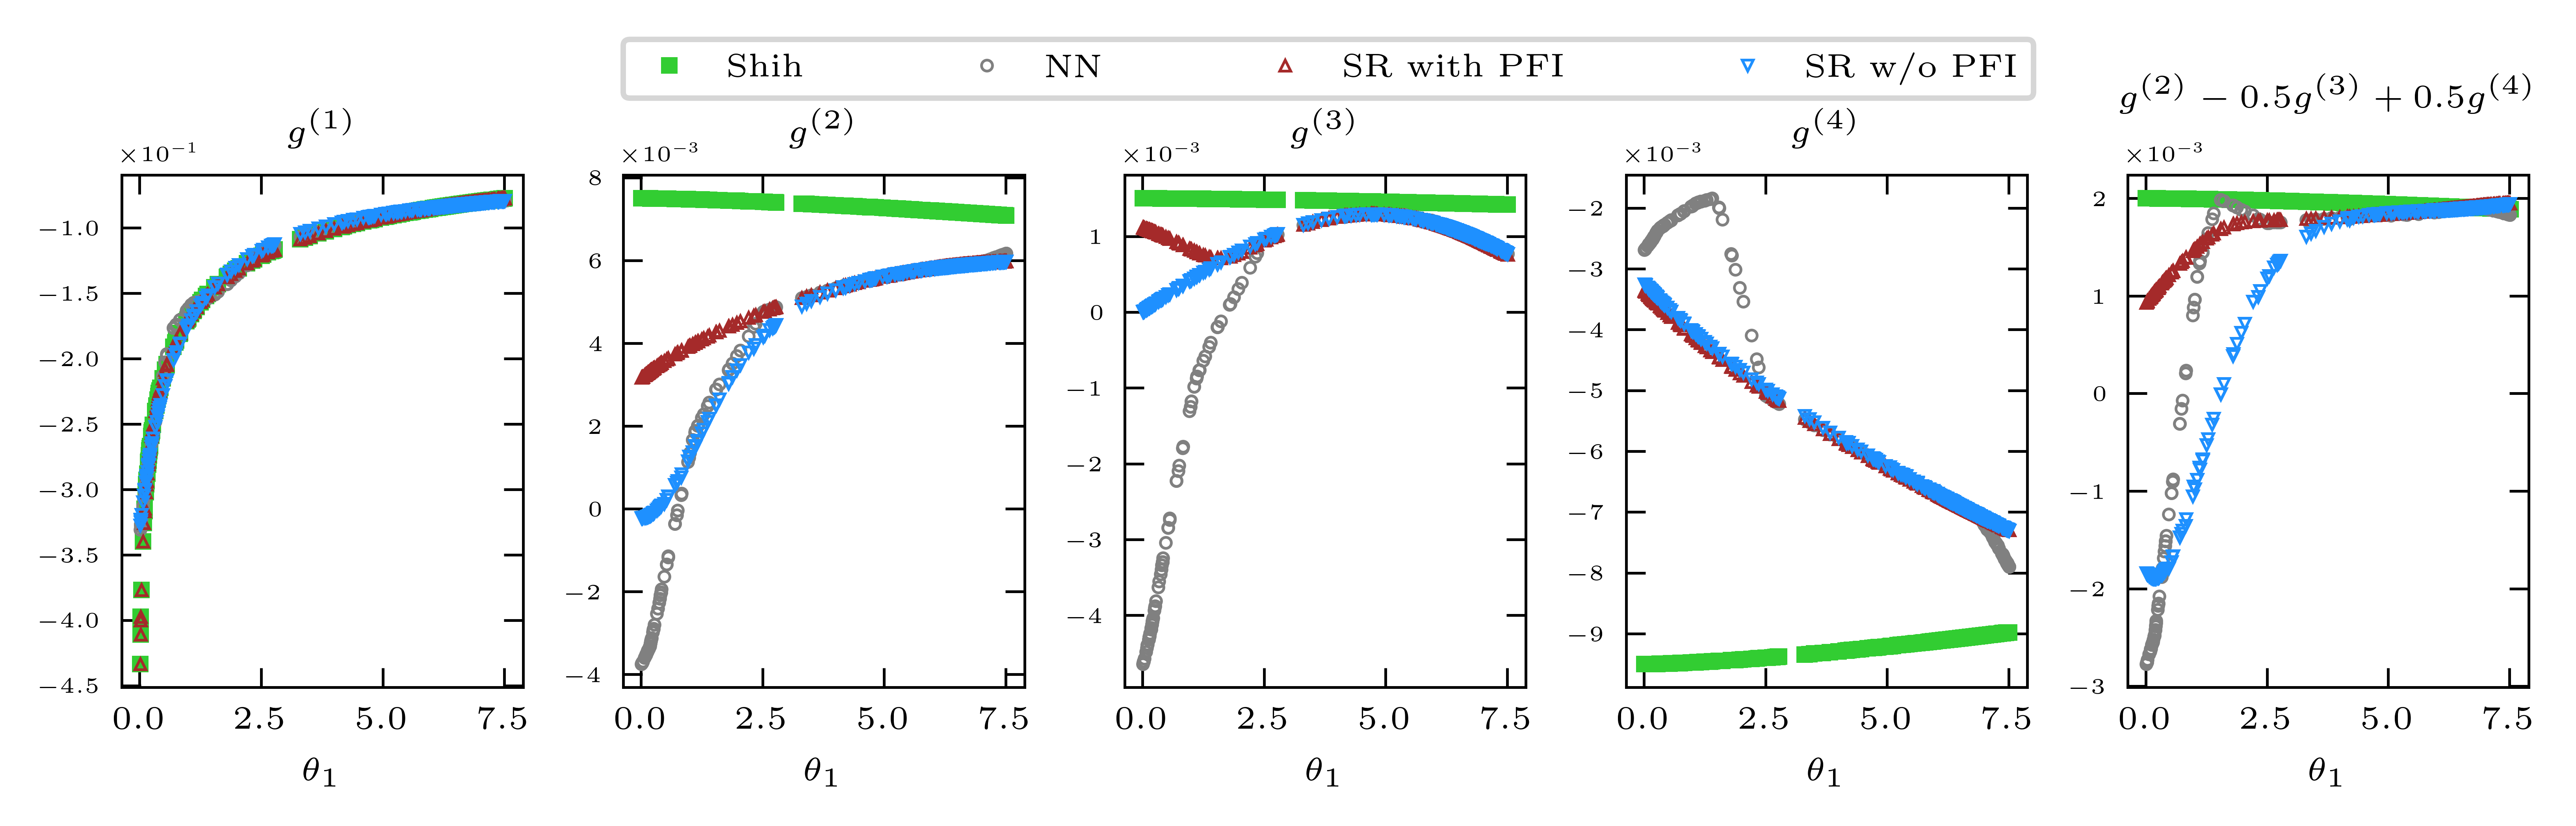

In [19]:
import numpy as np
import os
import fluidfoam as ff
import matplotlib.pyplot as plt

sampleDir = '../case-1/results_ensemble/sample_50'
t1 = ff.readscalar(sampleDir, '100', 'theta1')
t2 = ff.readscalar(sampleDir, '100', 'theta2')
t3 = ff.readscalar(sampleDir, '100', 'theta3')
t4 = ff.readscalar(sampleDir, '100', 'theta4')
t5 = ff.readscalar(sampleDir, '100', 'theta5')
t6 = ff.readscalar(sampleDir, '100', 'theta6')

fig, ax = plt.subplots(1, 5, figsize=(6.5, 2))
style_NN_org = {
    'linestyle': 'none',
    'marker': 'o',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'gray',
    'markerfacecolor': 'none'
}
style_NN_sub = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.5}
style_Shih = {
    'color': 'limegreen',
    'linestyle': 'none',
    'marker': 's',
    'markersize': 3,
    # 'markerfacecolor': 'none',
    'markeredgewidth': 0,
    'markeredgecolor': 'limegreen'
}
style_SR = {
    'linestyle': 'none',
    'marker': '^',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'brown',
    'markerfacecolor': 'none'
    # 'alpha': 0.5
}
style_SR0 = {
    'linestyle': 'none',
    'marker': 'v',
    'markersize': 2,
    'markeredgewidth': 0.5,
    'markeredgecolor': 'dodgerblue',
    'markerfacecolor': 'none'
}
style_Error = {'color': 'k', 'linestyle': '-', 'linewidth': 0.5}
sampleID = np.random.randint(0, np.size(t1), size=500)

# Shih
ax[0].plot(t1[sampleID], g1_Shih(t1)[sampleID], **style_Shih, label='Shih')
ax[1].plot(t1[sampleID], g2_Shih(t1)[sampleID], **style_Shih, label='Shih')
ax[2].plot(t1[sampleID], g3_Shih(t1)[sampleID], **style_Shih, label='Shih')
ax[3].plot(t1[sampleID], g4_Shih(t1)[sampleID], **style_Shih, label='Shih')
g5_Shih = g2_Shih(t1) - 0.5 * g3_Shih(t1) + 0.5 * g4_Shih(t1)
ax[4].plot(t1, g5_Shih, **style_Shih, label='Shih')

# NN
NN_inputs = np.array([t1, t2, t3, t4, t5, t6]).transpose()
g_NN = ml_func(NN_inputs)
ax[0].plot(t1[sampleID], g_NN[:, 0][sampleID], **style_NN_org, label='NN')
ax[1].plot(t1[sampleID], g_NN[:, 1][sampleID], **style_NN_org, label='NN')
ax[2].plot(t1[sampleID], g_NN[:, 2][sampleID], **style_NN_org, label='NN')
ax[3].plot(t1[sampleID], g_NN[:, 3][sampleID], **style_NN_org, label='NN')
g5_NN = g_NN[:, 1] - 0.5 * g_NN[:, 2] + 0.5 * g_NN[:, 3]
ax[4].plot(t1[sampleID], g5_NN[sampleID], **style_NN_org, label='NN')

# SR
ax[0].plot(t1[sampleID], g1_SR(t1)[sampleID], **style_SR, label='SR with PFI')
ax[1].plot(t1[sampleID], g2_SR(t1)[sampleID], **style_SR, label='SR with PFI')
ax[2].plot(t1[sampleID], g3_SR(t1)[sampleID], **style_SR, label='SR with PFI')
ax[3].plot(t1[sampleID], g4_SR(t1)[sampleID], **style_SR, label='SR with PFI')
g5_SR = g2_SR(t1) - 0.5 * g3_SR(t1) + 0.5 * g4_SR(t1)
ax[4].plot(t1[sampleID], g5_SR[sampleID], **style_SR, label='SR with PFI')

# SR0
ax[0].plot(t1[sampleID],
           g1_SR0(t1, t2, t3, t4, t5, t6)[sampleID],
           **style_SR0,
           label='SR w/o PFI')
ax[1].plot(t1[sampleID],
           g2_SR0(t1, t2, t3, t4, t5, t6)[sampleID],
           **style_SR0,
           label='SR w/o PFI')
ax[2].plot(t1[sampleID],
           g3_SR0(t1, t2, t3, t4, t5, t6)[sampleID],
           **style_SR0,
           label='SR w/o PFI')
ax[3].plot(t1[sampleID],
           g4_SR0(t1, t2, t3, t4, t5, t6)[sampleID],
           **style_SR0,
           label='SR w/o PFI')
g5_SR0 = g2_SR0(t1, t2, t3, t4, t5, t6) - 0.5 * g3_SR0(
    t1, t2, t3, t4, t5, t6) + 0.5 * g4_SR0(t1, t2, t3, t4, t5, t6)
ax[4].plot(t1[sampleID], g5_SR0[sampleID], **style_SR0, label='SR w/o PFI')

ax[0].set(title=r'$g^{(1)}$')
ax[1].set(title=r'$g^{(2)}$')
ax[2].set(title=r'$g^{(3)}$')
ax[3].set(title=r'$g^{(4)}$')
ax[4].set(title=r'$g^{(2)}-0.5g^{(3)}+0.5g^{(4)}$')

ax[1].legend(loc=(0, 1.15), ncols=6, columnspacing=4.5)
for i in range(5):
    # ax[0][i].set(xlabel=r'$\theta_1$')
    ax[i].set(xlabel=r'$\theta_1$')
    ax[i].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.subplots_adjust(left=0.05,
                    right=0.99,
                    wspace=0.25,
                    bottom=0.15,
                    top=0.8,
                    hspace=0.22)
plt.savefig('SR-DUCT-g.png')